## Autoregression Model
## Matt Marroquin
## Team DKM

                                NAME        DATE  PRCP  TMAX  TMIN  TOBS
0  SAN ANTONIO INCARNATE WORD, TX US  2017-05-01   0.1  78.0  45.0  63.0
1  SAN ANTONIO INCARNATE WORD, TX US  2017-05-02   0.0  89.0  54.0  68.0
2  SAN ANTONIO INCARNATE WORD, TX US  2017-05-03   0.0  90.0  68.0  76.0
3  SAN ANTONIO INCARNATE WORD, TX US  2017-05-04   0.0  90.0  50.0  65.0
4  SAN ANTONIO INCARNATE WORD, TX US  2017-05-05   0.0  79.0  44.0  68.0
                                  NAME        DATE  PRCP  TMAX  TMIN  TOBS
606  SAN ANTONIO INCARNATE WORD, TX US  2018-12-28   NaN  71.0  45.0   NaN
607  SAN ANTONIO INCARNATE WORD, TX US  2018-12-29   NaN  59.0  42.0  43.0
608  SAN ANTONIO INCARNATE WORD, TX US  2018-12-30  0.90  47.0  40.0  40.0
609  SAN ANTONIO INCARNATE WORD, TX US  2018-12-31  0.19  43.0  40.0  41.0
610  SAN ANTONIO INCARNATE WORD, TX US  2019-01-01  0.01  59.0  34.0   NaN


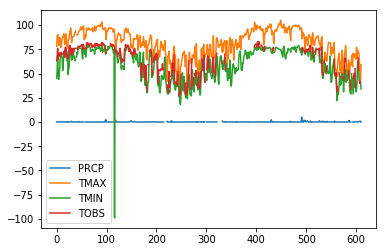

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('2017-2019TempNormals.csv', header=0)
df.drop(df.columns[0], axis=1, inplace=True) 
print(df.head())
print(df.tail())
df.plot()
pyplot.show()

## Preprocessing

In [3]:
#replace missing values with mean
df['TMIN'].fillna((df['TMIN'].mean()), inplace=True)

#fill missing values in dates column 
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    return [start+datetime.timedelta(days=i) for i in range(r)]
 
start = datetime.date(2017,5,1)
end = datetime.date(2019,1,1)
dateList = date_range(start, end)
print(str(dateList[1]))
#print('\n'.join([str(date) for date in dateList]))

for index, row in df.iterrows():
    df.at[index,'date'] = str(dateList[index])  

#remove outlier in TMIN
df = df.drop(df.index[116])

2017-05-02


## Checking for patterns

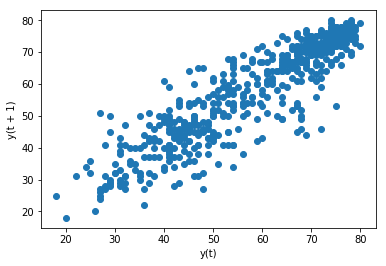

In [4]:
# (x) min temperature data, (y) previous day min temperature
pd.plotting.lag_plot(df['TMIN'])

## Pearson correlation coefficient

In [14]:
values = pd.DataFrame(df['TMIN'].values)
df2 = pd.concat([values.shift(1), values], axis=1)
df2.columns = ['t-1', 't+1']
result = df2.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.911045
t+1  0.911045  1.000000


## Predict the last 7 days of minimum temperatures

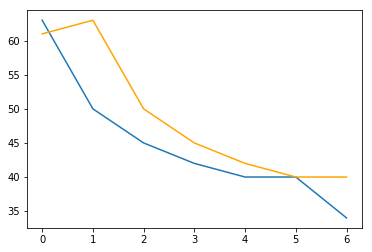

In [12]:
# generate lagged dataset
vals = DataFrame(df['TMIN'].values)
df3 = concat([vals.shift(1), vals], axis=1)
df3.columns = ['t-1', 't+1']
# tester and trainer sets
df3vals = df3.values
train, test = df3vals[1:len(df3vals)-7], df3vals[len(df3vals)-7:]
Xtrain, Ytrain = train[:,0], train[:,1]
Xtest, Ytest = test[:,0], test[:,1]

# validation
predictions = []
for var in Xtest:
    predictions.append(var)

score = mean_squared_error(Ytest, predictions)
print('Mean squared error: %.2f' % score)
# plot of predictions vs expected
pyplot.plot(Ytest)
pyplot.plot(predictions, color='orange')
pyplot.show()

## Predict the last 6 days of minimum temperatures in the dataset

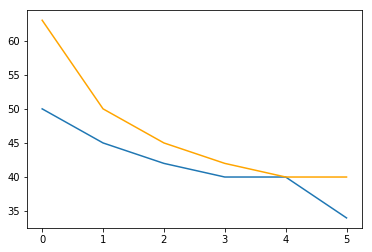

In [7]:
# generate lagged dataset
vals = DataFrame(df['TMIN'].values)
df3 = concat([vals.shift(1), vals], axis=1)
df3.columns = ['t-1', 't+1']
# tester and trainer sets
df3vals = df3.values
train, test = df3vals[1:len(df3vals)-6], df3vals[len(df3vals)-6:]
Xtrain, Ytrain = train[:,0], train[:,1]
Xtest, Ytest = test[:,0], test[:,1]

# validation
predictions = []
for var in Xtest:
    predictions.append(var)

score = mean_squared_error(Ytest, predictions)
print('Mean squared error: %.2f' % score)
# plot of predictions vs expected
pyplot.plot(Ytest)
pyplot.plot(predictions, color='orange')
pyplot.show()

## Predict the last 8 days of minimum temperatures in the dataset

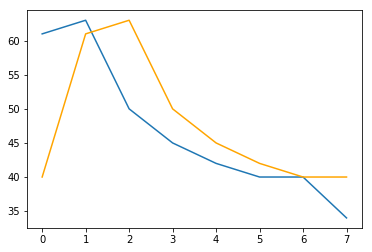

In [8]:
# generate lagged dataset
vals = DataFrame(df['TMIN'].values)
df3 = concat([vals.shift(1), vals], axis=1)
df3.columns = ['t-1', 't+1']
# tester and trainer sets
df3vals = df3.values
train, test = df3vals[1:len(df3vals)-8], df3vals[len(df3vals)-8:]
Xtrain, Ytrain = train[:,0], train[:,1]
Xtest, Ytest = test[:,0], test[:,1]

# validation
predictions = []
for var in Xtest:
    predictions.append(var)

score = mean_squared_error(Ytest, predictions)
print('Mean squared error: %.2f' % score)
# plot of predictions vs expected
pyplot.plot(Ytest)
pyplot.plot(predictions, color='orange')
pyplot.show()

## Autoregression model for 7-day forecast

n-lag model picked and trained by AR model: 19

prediction=49.65, actual=63.00
prediction=46.10, actual=50.00
prediction=41.97, actual=45.00
prediction=40.42, actual=42.00
prediction=41.47, actual=40.00
prediction=43.98, actual=40.00
prediction=43.90, actual=34.00


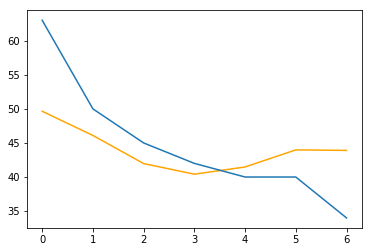

In [18]:
# get the data
vals2 = df['TMIN'].values
vals2train, vals2test = vals2[1:len(vals2)-7], vals2[len(vals2)-7:]
vals2train = vals2train[~np.isnan(vals2train)] #cleaning nan values
# autoregression training
arModel = AR(vals2train)
fitModel = arModel.fit()
print('n-lag model picked and trained by AR model: %s\n' % fitModel.k_ar)
#print('Coefficients of the trained linear regression model:\n %s\n' % fitModel.params)
# predictions
predictmodel = fitModel.predict(start=len(vals2train), end=len(vals2train)+len(vals2test)-1, dynamic=False)
for i in range(len(predictmodel)):
    print('prediction=%.2f, actual=%.2f' % (predictmodel[i], vals2test[i]))
mserror = mean_squared_error(vals2test, predictmodel)
print('Mean squared error: %.2f\n' % mserror)
# 7day forecast plot
pyplot.plot(predictmodel, color='orange')
pyplot.plot(vals2test)
pyplot.show()

## Autoregression model for 6-day forecast

n-lag model picked and trained by AR model: 19

prediction=54.24, actual=50.00
prediction=47.72, actual=45.00
prediction=43.99, actual=42.00
prediction=44.39, actual=40.00
prediction=47.49, actual=40.00
prediction=47.12, actual=34.00


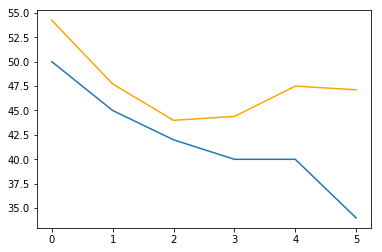

In [17]:
vals2train, vals2test = vals2[1:len(vals2)-6], vals2[len(vals2)-6:]
vals2train = vals2train[~np.isnan(vals2train)] #cleaning nan values
# autoregression training
arModel = AR(vals2train)
fitModel = arModel.fit()
print('n-lag model picked and trained by AR model: %s\n' % fitModel.k_ar)
#print('Coefficients of the trained linear regression model:\n %s\n' % fitModel.params)
# predictions
predictmodel = fitModel.predict(start=len(vals2train), end=len(vals2train)+len(vals2test)-1, dynamic=False)
for i in range(len(predictmodel)):
    print('prediction=%.2f, actual=%.2f' % (predictmodel[i], vals2test[i]))
mserror = mean_squared_error(vals2test, predictmodel)
print('Mean squared error: %.2f\n' % mserror)
# 7day forecast plot
pyplot.plot(predictmodel, color='orange')
pyplot.plot(vals2test)
pyplot.show()

## Autoregression model for 8-day forecast

n-lag model picked and trained by AR model: 19

prediction=40.91, actual=61.00
prediction=42.44, actual=63.00
prediction=39.87, actual=50.00
prediction=38.68, actual=45.00
prediction=37.28, actual=42.00
prediction=39.76, actual=40.00
prediction=41.79, actual=40.00
prediction=40.17, actual=34.00


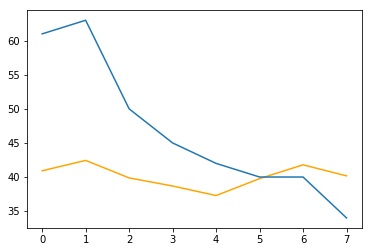

In [16]:
vals2train, vals2test = vals2[1:len(vals2)-8], vals2[len(vals2)-8:]
vals2train = vals2train[~np.isnan(vals2train)] #cleaning nan values
# autoregression training
arModel = AR(vals2train)
fitModel = arModel.fit()
print('n-lag model picked and trained by AR model: %s\n' % fitModel.k_ar)
#print('Coefficients of the trained linear regression model:\n %s\n' % fitModel.params)
# predictions
predictmodel = fitModel.predict(start=len(vals2train), end=len(vals2train)+len(vals2test)-1, dynamic=False)
for i in range(len(predictmodel)):
    print('prediction=%.2f, actual=%.2f' % (predictmodel[i], vals2test[i]))
mserror = mean_squared_error(vals2test, predictmodel)
print('Mean squared error: %.2f\n' % mserror)
# 7day forecast plot
pyplot.plot(predictmodel, color='orange')
pyplot.plot(vals2test)
pyplot.show()